In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.weightstats import ztest

pd.set_option('display.max_columns', None)
plt.rcParams['figure.figsize'] = (12, 8)

In [5]:
df = pd.read_csv('game_info_18-19.csv')
df.head()

,game_id,home_team,home_id,home_rank,home_record,home_score,away_team,away_id,away_rank,away_record,away_score,home_win,num_ots,is_conference,is_neutral,is_postseason,tournament,game_day,game_time,game_loc,arena,arena_capacity,attendance,tv_network,referee_1,referee_2,referee_3
0,401082470,Kansas Jayhawks,2305,1.0,1-0,92,Michigan State Spartans,127,10.0,0-1,87,True,0,False,True,False,STATE FARM CHAMPIONS CLASSIC,"November 06, 2018",04:00 PM PST,"Indianapolis, IN",Gainbridge Fieldhouse,17923,18907,ESPN,Terry Wymer,Keith Kimble,Mike Eades
1,401082669,Kentucky Wildcats,96,2.0,0-1,84,Duke Blue Devils,150,4.0,1-0,118,False,0,False,True,False,STATE FARM CHAMPIONS CLASSIC,"November 06, 2018",07:03 PM PST,"Indianapolis, IN",Gainbridge Fieldhouse,17923,18907,ESPN,Jeff Clark,Doug Shows,Ron Groover
2,401083627,Gonzaga Bulldogs,2250,3.0,1-0,120,Idaho State Bengals,304,NaN,0-1,79,True,0,False,False,False,NaN,"November 06, 2018",06:00 PM PST,"Spokane, WA",McCarthey Athletic Center,6000,6000,NaN,Rick Batsell,Sam Haddad,Sir Allen Conner
3,401082762,Virginia Cavaliers,258,5.0,1-0,73,Towson Tigers,119,NaN,0-1,42,True,0,False,False,False,NaN,"November 06, 2018",04:00 PM PST,"Charlottesville, VA",John Paul Jones Arena,14623,13807,ACCNX,Jeremy Mosier,Raymie Styons,Ted Valentine
4,401082974,Tennessee Volunteers,2633,6.0,1-0,86,Lenoir-Rhyne Bears,nd-lenoir-rhyne-bears,NaN,NaN,41,True,0,False,False,False,NaN,"November 06, 2018",04:00 PM PST,"Knoxville, TN",Thompson-Boling Arena,21678,16156,SECN,Brian Shey,Byron Jarrett,Steve Orkus


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6049 entries, 0 to 6048
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   game_id         6049 non-null   int64  
 1   home_team       6049 non-null   object 
 2   home_id         6049 non-null   object 
 3   home_rank       596 non-null    float64
 4   home_record     6047 non-null   object 
 5   home_score      6049 non-null   int64  
 6   away_team       6049 non-null   object 
 7   away_id         6049 non-null   object 
 8   away_rank       432 non-null    float64
 9   away_record     5605 non-null   object 
 10  away_score      6049 non-null   int64  
 11  home_win        6049 non-null   bool   
 12  num_ots         6049 non-null   int64  
 13  is_conference   6049 non-null   bool   
 14  is_neutral      6049 non-null   bool   
 15  is_postseason   6049 non-null   bool   
 16  tournament      1088 non-null   object 
 17  game_day        6049 non-null   o

In [18]:
len(df)

6049

# Cleaning

In [19]:
df.home_team.str.contains('nd').sum(), df.away_team.str.contains('nd').sum()

(374, 385)

In [20]:
df = df.loc[(~df.home_team.str.contains('nd')) & (~df.away_team.str.contains('nd'))].reset_index(drop=True)
len(df)

5314

In [39]:
df = df.loc[~df.is_postseason]
len(df)

5190

# EDA

<AxesSubplot:xlabel='home_score', ylabel='Count'>

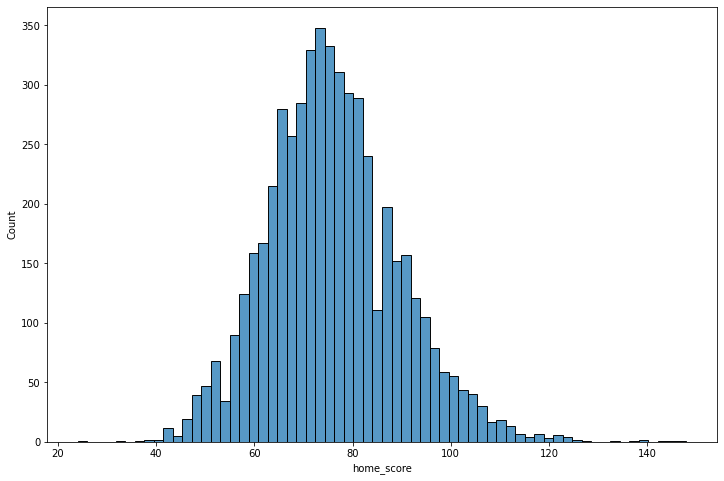

In [40]:
sns.histplot(data=df, x='home_score')

<AxesSubplot:xlabel='away_score', ylabel='Count'>

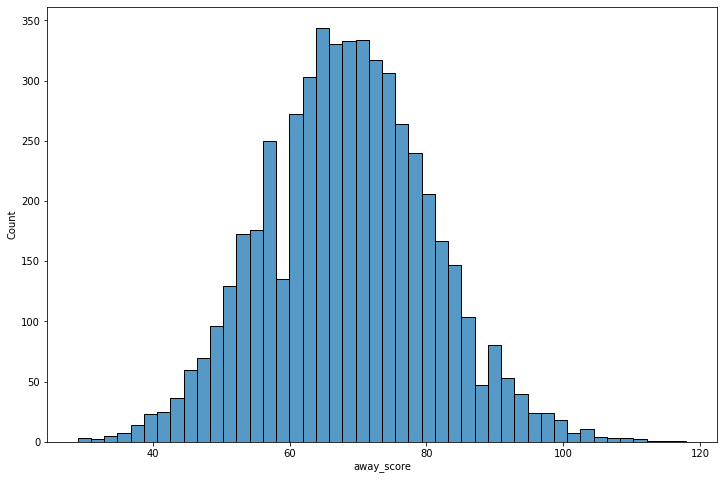

In [41]:
sns.histplot(data=df, x='away_score')

In [42]:
df.home_score.mean(), df.away_score.mean()

(75.94643545279384, 68.54123314065511)

<AxesSubplot:xlabel='home_score', ylabel='home_rank'>

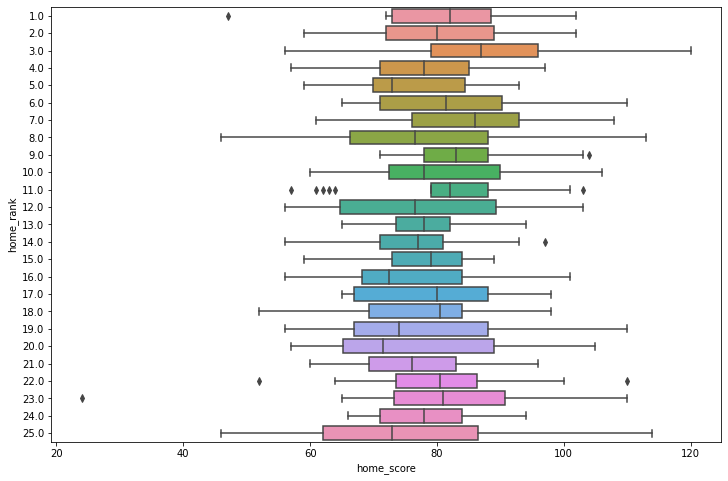

In [43]:
sns.boxplot(data=df, x='home_score', y='home_rank', orient='h')

# Hypotheses

### 21-25 scores not diff from 1-5 scores

In [45]:
df_t5 = df.loc[df.home_rank.isin([1,2,3,4,5])]
df_b5 = df.loc[df.home_rank.isin([21,22,23,24,25])]
len(df_t5), len(df_b5)

(101, 82)

In [46]:
ztest(df_t5.home_score, df_b5.home_score)

(1.0979769680368396, 0.27221454660716704)